In [1]:
using Revise
using ShallowWater
using Plots

# Solve a 1D system forward in time

In [ ]:
prob = ShallowWaterProblem(
    ones(300),
    L=50,  # meters
    nx=300,  # space discretization
    tspan=(0.0, 25.0),
)

acc_time_points = LinRange(0, 25, 20)
# acc_values = [0.2 * sin(2t / 2pi) for t in acc_time_points[1:end-1]]
acc_values = 0.5 * randn(length(acc_time_points) - 1)
acc = DiscreteAcceleration(acc_values, acc_time_points)

sol = solve_forward(prob, acc);

┌ Info: Saved animation to /var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/jl_XebiBKDuRG.gif
└ @ Plots /Users/alexrubin/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/jl_XebiBKDuRG.gif")
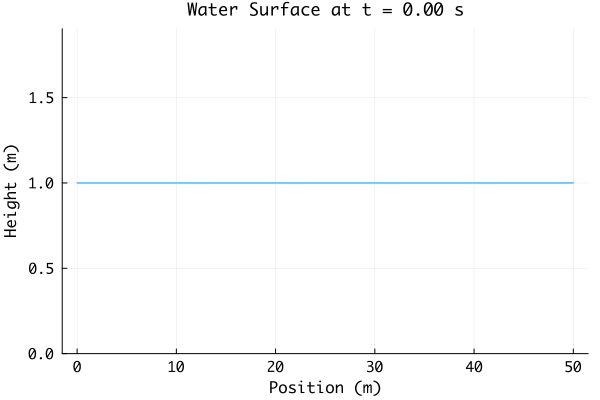

In [146]:
create_animation(sol, prob)

# Optimize 1D acceleration to hit a target water shape

In [ ]:
nx = 300
target = 1 .+ [0.2*sin(2i * pi / nx) for i in 1:nx]

prob = ShallowWaterProblem(
    target,
    L=50,  # meters
    nx=300,  # space discretization
    tspan=(0.0, 25.0),
)

acc = optimize(prob)

Objective: 3.0


┌ Warning: At t=1.877434333521341, dt was forced below floating point epsilon 2.220446049250313e-16, and step error estimate = 74.27285090907475. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/alexrubin/.julia/packages/SciMLBase/VAClc/src/integrator_interface.jl:623
┌ Warning: At t=2.1854989921730406, dt was forced below floating point epsilon 4.440892098500626e-16, and step error estimate = 66.62061058757286. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/alexrubin/.julia/packages/SciMLBase/VAClc/src/integrator_interface.jl:623
┌ Warning: At t=2.7228076811674295, dt was forced below floating point epsilon 4.440892098500626e-16, and step error estimate = 66.42433399272817. Aborting. There is either an

Objective: 1.6975453121254143
Objective: 1.1452480198086452
Objective: 0.8929671824231226
Objective: 0.7688505967050263
Objective: 0.4641563706249747
Objective: 0.31884264336824353
Objective: 0.258669502892885
Objective: 0.2119588502377012
Objective: 0.2014503405626122
Objective: 0.19333905702909615
Objective: 0.15857541675469372
Objective: 0.12687999217725196
Objective: 0.12481622596842264
Objective: 0.1151134101297807
Objective: 0.09692707028927412
Objective: 0.07668772393954736
Objective: 0.07603737276745419
Objective: 0.06816098229848261
Objective: 0.061220695137035624
Objective: 0.059833958391836556
Objective: 0.05962407270265203
Objective: 0.051928516608175795
Objective: 0.046592401375437735
Objective: 0.043601395682916565
Objective: 0.043431327585848244
Objective: 0.037990341112729635
Objective: 0.035741986965416264
Objective: 0.035144607964279206
Objective: 0.034464332728035375
Objective: 0.03356834988116165
Objective: 0.030522100585720326
Objective: 0.030136155422428427
Object

DiscreteAcceleration([-0.0573437269644928, -0.04506981877645728, -0.036781180195931414, -0.03351227517572907, -0.033512256455918384, -0.03327402120841677, -0.029243058343176916, -0.01937589073502272, -0.003853820244503989, 0.015258744324728003  …  0.0686291816021429, 0.018005785243117734, -0.03389502464495724, -0.07275018377690526, -0.08999554930471802, -0.09026469914296138, -0.09275848102683416, -0.11837087646480449, -0.15540248730981204, -0.10448964007588603], [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5000000000000004, 4.0, 4.5  …  20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0])

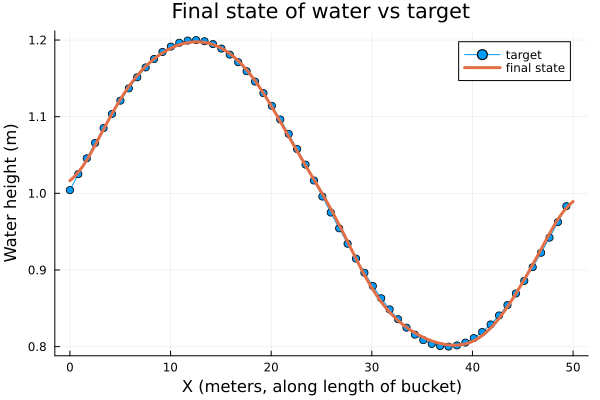

In [206]:
# compare the final state with the target state
sol = solve_forward(prob, acc);
plot(
    xlabel="X (meters, along length of bucket)",
    ylabel="Water height (m)",
    title="Final state of water vs target",
)
plot!(prob.x[1:5:end], prob.target[1:5:end], marker=:circle, label="target")
plot!(prob.x, sol.u[end][1:nx], linewidth=3, label="final state")

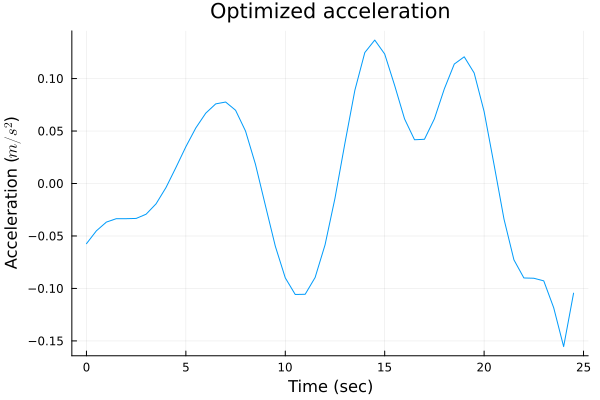

In [204]:
# plot the optimized acceleration pattern
plot(
    acc.times[1:end-1],
    acc.values,
    label=nothing,
    xlabel="Time (sec)",
    ylabel="Acceleration (\$m/s^2\$)",
    title="Optimized acceleration",
)


┌ Info: Saved animation to /var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/jl_LmPgpMTSzQ.gif
└ @ Plots /Users/alexrubin/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/jl_LmPgpMTSzQ.gif")
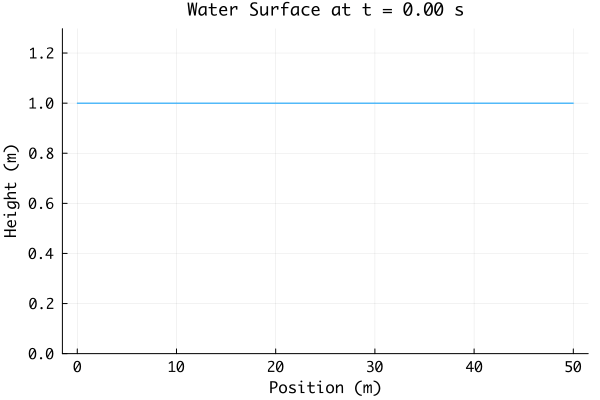

In [ ]:
# show the animation of the optimized solution reaching the target
create_animation(sol, prob)